<a href="https://colab.research.google.com/github/kalyankarkunal/Technook-ASSINGMENT/blob/main/DS_MAJOR_OCTOBER_KALYANKAR_KUNAL(KUNAL_AHER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question:Major Project

Take any Dataset of your choice ,perform EDA(Exploratory Data Analysis) and apply a
suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.

dataset=crop production,
sutaible algorithm is linear regression 


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [9]:
df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [10]:
len(df['State_Name'].unique())

33

In [11]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [12]:
df['District_Name'].nunique()

646

In [13]:
pro_df=df["Production"].max()

pro_df


        

1250800000.0

In [14]:
df[df["Production"]==1250800000.0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09


In [15]:
df["Production"].median ()

729.0

In [16]:
df[df["Production"]==729.0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7373,Andhra Pradesh,SRIKAKULAM,2006,Rabi,Sesamum,4471.0,729.0
10684,Arunachal Pradesh,KURUNG KUMEY,2010,Kharif,Small millets,540.0,729.0
15605,Assam,DHEMAJI,2003,Whole Year,Arecanut,861.0,729.0
25098,Assam,SIVASAGAR,2002,Whole Year,Orange,81.0,729.0
27729,Bihar,ARWAL,2008,Whole Year,Onion,106.0,729.0
28144,Bihar,AURANGABAD,2007,Autumn,Maize,500.0,729.0
28866,Bihar,BEGUSARAI,2000,Kharif,Urad,1171.0,729.0
29532,Bihar,BHAGALPUR,2002,Rabi,Rapeseed &Mustard,2271.0,729.0
34077,Bihar,KATIHAR,2007,Kharif,Ragi,1085.0,729.0
40011,Bihar,PURBI CHAMPARAN,2003,Rabi,Rapeseed &Mustard,1135.0,729.0


In [17]:
Total_of_unique_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()
def crops(Total_of_unique_crops,types_of_crops):
        print('There are {} different types of crops'.format(Total_of_unique_crops))
        print('------------------------------------')
        print('They different types of crops are :-',types_of_crops)
crops(Total_of_unique_crops,types_of_crops)

There are 124 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 

In [18]:
df["Season"].value_counts ()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

<BarContainer object of 242361 artists>

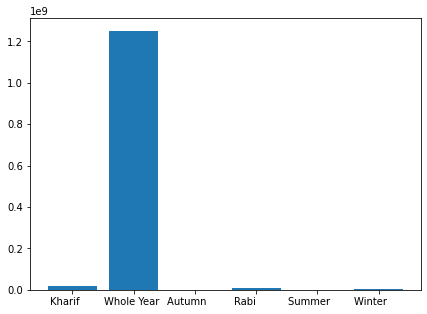

In [19]:
plt.figure(figsize=(7,5))
plt.bar(df["Season"],df["Production"]) 

In [20]:
# lets get the production asper State_Name 

In [21]:
production_state=df.groupby("State_Name")["Production"].sum().sort_values(ascending=False)
production_state



State_Name
Kerala                         9.788005e+10
Andhra Pradesh                 1.732459e+10
Tamil Nadu                     1.207644e+10
Uttar Pradesh                  3.234493e+09
Assam                          2.111752e+09
West Bengal                    1.397904e+09
Maharashtra                    1.263641e+09
Karnataka                      8.634298e+08
Andaman and Nicobar Islands    7.182232e+08
Punjab                         5.863850e+08
Gujarat                        5.242913e+08
Goa                            5.057558e+08
Madhya Pradesh                 4.488407e+08
Puducherry                     3.847245e+08
Haryana                        3.812739e+08
Bihar                          3.664836e+08
Telangana                      3.351479e+08
Rajasthan                      2.813203e+08
Odisha                         1.609041e+08
Uttarakhand                    1.321774e+08
Chhattisgarh                   1.009519e+08
Himachal Pradesh               1.780517e+07
Jammu and Kashmir    

In [22]:
# plt.bar(df["State_Name"],df["Production"])

In [23]:
df.groupby("State_Name").sum()["Production"].nlargest()


State_Name
Kerala            9.788005e+10
Andhra Pradesh    1.732459e+10
Tamil Nadu        1.207644e+10
Uttar Pradesh     3.234493e+09
Assam             2.111752e+09
Name: Production, dtype: float64

In [24]:
df.groupby("State_Name").sum()["Production"].nsmallest()

State_Name
Chandigarh                  63956.50
Mizoram                   1661539.83
Dadra and Nagar Haveli    1847871.00
Sikkim                    2435735.00
Manipur                   5230917.00
Name: Production, dtype: float64

In [25]:
df.groupby("State_Name").sum()["Production"].round()

State_Name
Andaman and Nicobar Islands    7.182232e+08
Andhra Pradesh                 1.732459e+10
Arunachal Pradesh              6.823913e+06
Assam                          2.111752e+09
Bihar                          3.664836e+08
Chandigarh                     6.395600e+04
Chhattisgarh                   1.009519e+08
Dadra and Nagar Haveli         1.847871e+06
Goa                            5.057558e+08
Gujarat                        5.242913e+08
Haryana                        3.812739e+08
Himachal Pradesh               1.780517e+07
Jammu and Kashmir              1.329102e+07
Jharkhand                      1.077774e+07
Karnataka                      8.634298e+08
Kerala                         9.788005e+10
Madhya Pradesh                 4.488407e+08
Maharashtra                    1.263641e+09
Manipur                        5.230917e+06
Meghalaya                      1.211250e+07
Mizoram                        1.661540e+06
Nagaland                       1.276595e+07
Odisha               

In [27]:
production_dist=df.groupby('District_Name')["Production"].sum().sort_values()
p_dist=production_dist[0:5]
p_dist

District_Name
MUMBAI          2.0
NAMSAI        794.0
HYDERABAD    3835.0
KHUNTI       5024.0
RAMGARH      5472.0
Name: Production, dtype: float64

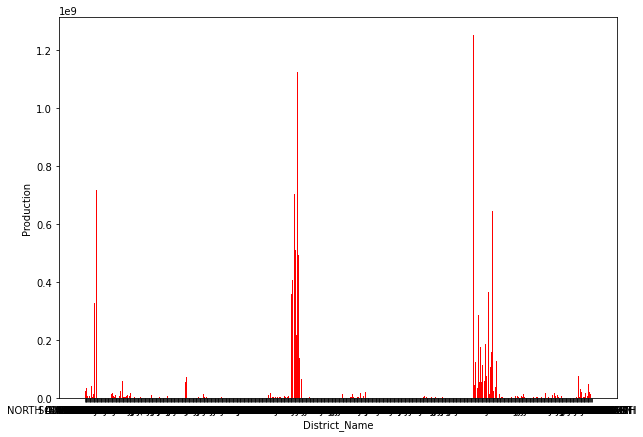

District_Name
MUMBAI          2.0
NAMSAI        794.0
HYDERABAD    3835.0
KHUNTI       5024.0
RAMGARH      5472.0
Name: Production, dtype: float64


In [198]:
def prod_dist():
  p_dist=production_dist[0:5]
  plt.figure(figsize=(10,7))
  plt.bar(df['District_Name'],df['Production'],color="red")[0:5]
  plt.xlabel("District_Name")
  plt.ylabel("Production")
  plt.show()
  print(p_dist)
prod_dist()  

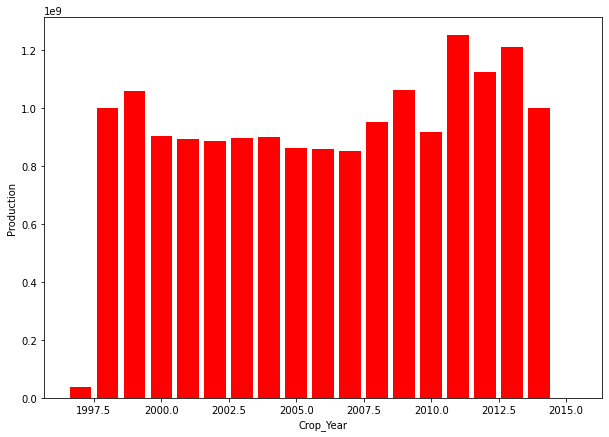

In [197]:
plt.figure(figsize=(10,7))
plt.bar(df['Crop_Year'],df['Production'],color="red")
plt.xlabel("Crop_Year")
plt.ylabel("Production")
plt.show()

In [30]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [31]:
df.groupby('Season').sum()['Production']

Season
Autumn         6.441377e+07
Kharif         4.029970e+09
Rabi           2.051688e+09
Summer         1.706579e+08
Whole Year     1.344248e+11
Winter         4.345498e+08
Name: Production, dtype: float64

In [32]:
def Percentage_production():
  df["Percentage_production"]=df["Production"]/df["Production"].sum()*100
  print(df["Percentage_production"])
 
Percentage_production()  

0         1.416670e-06
1         7.083351e-10
2         2.273756e-07
3         4.540428e-07
4         1.168753e-07
              ...     
246086    5.673764e-07
246087    3.279592e-07
246088    1.151045e-05
246089    4.235129e-04
246090    6.233349e-08
Name: Percentage_production, Length: 242361, dtype: float64


In [33]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


In [34]:
Maha_df = df[df["State_Name"]=="Maharashtra"]
Maha_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0,7.883770e-07
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0,4.462511e-06
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0,1.082336e-04
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0,1.317503e-05
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0,7.791686e-07
...,...,...,...,...,...,...,...,...
137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0,2.337506e-06
137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,200.0,1.416670e-07
137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,26800.0,1.898338e-05
137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,11500.0,8.145854e-06


In [35]:
Maha_df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0,7.883770e-07
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0,4.462511e-06
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0,1.082336e-04
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0,1.317503e-05
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0,7.791686e-07
125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400.0,4700.0,3.329175e-06
125197,Maharashtra,AHMEDNAGAR,1997,Kharif,Moong(Green Gram),10200.0,900.0,6.375016e-07
125198,Maharashtra,AHMEDNAGAR,1997,Kharif,Pulses total,451.0,130.0,9.208356e-08
125199,Maharashtra,AHMEDNAGAR,1997,Kharif,Ragi,2600.0,2100.0,1.487504e-06
125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,5900.0,7200.0,5.100013e-06


In [36]:

Maha_df.groupby('Season').sum()['Production']

Season
Autumn             19695.0
Kharif         536463806.7
Rabi            70912135.5
Summer           2957812.0
Whole Year     653287157.0
Name: Production, dtype: float64

In [37]:
high_Maha_pro = Maha_df.groupby('Crop').sum()['Production'].sort_values(ascending=False)
high_Maha_pro.nlargest(10)

Crop
Sugarcane       938485965.0
Cotton(lint)     71786349.0
Jowar            55018576.0
Rice             43008628.0
Soyabean         39994352.0
Wheat            22443475.0
Maize            20853343.0
Bajra            16029469.0
Arhar/Tur        12870087.0
Gram             12630797.0
Name: Production, dtype: float64

In [38]:
len(Maha_df['Crop'].unique())

34

In [39]:
# in Maharashtra highest yeiled crop is Sugarcan and 2nd is Cotton 
d=Maha_df["Crop"][0:35]
d

125191                      Maize
125192                  Arhar/Tur
125193                      Bajra
125194                       Gram
125195                      Jowar
125196                      Maize
125197          Moong(Green Gram)
125198               Pulses total
125199                       Ragi
125200                       Rice
125201                  Sugarcane
125202            Total foodgrain
125203                       Urad
125204                      Jowar
125205                      Maize
125206         Other  Rabi pulses
125207                      Wheat
125208                      Maize
125209               Cotton(lint)
125210                  Arhar/Tur
125211                      Bajra
125212                Castor seed
125213               Cotton(lint)
125214                  Groundnut
125215                      Jowar
125216                      Maize
125217          Moong(Green Gram)
125218                 Niger seed
125219    Other Cereals & Millets
125220        

In [40]:
# plt.barh(d["Crop"],d["Production"],color=["grey","blue","red","pink"])

In [41]:
Sugar_df=df[df["Crop"]=="Sugarcane"]
Sugar_df 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,2.833340e-08
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,3.541676e-10
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,2.957299e-08
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,8.174895e-06
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,1.435370e-05
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,7.932645e-06
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,5.629847e-06


<BarContainer object of 7827 artists>

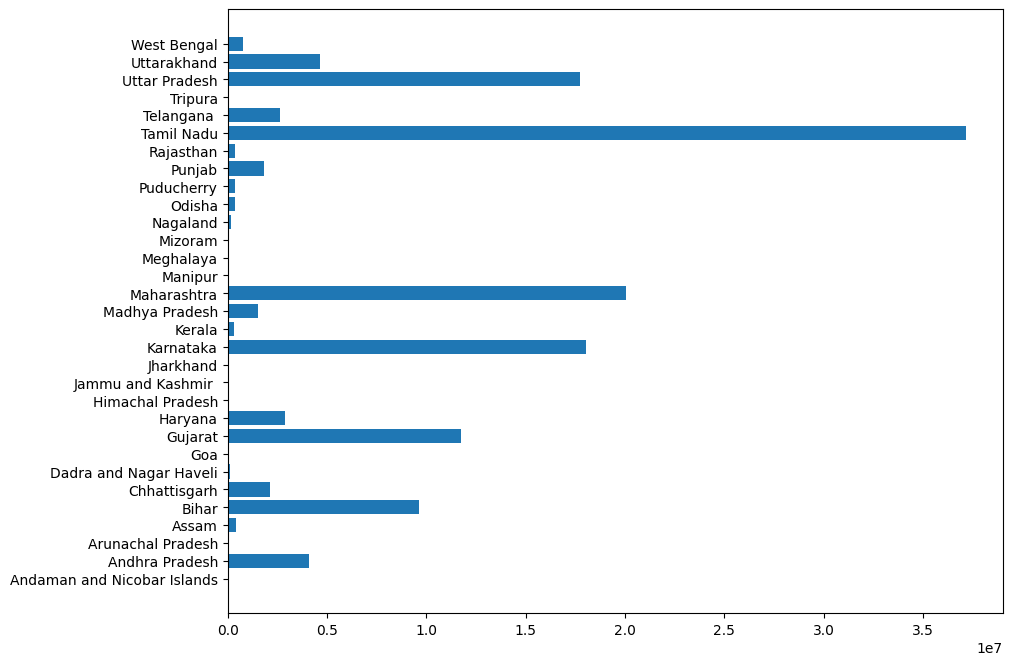

In [43]:
plt.figure(figsize=(10,8),dpi=100)
plt.barh(Sugar_df["State_Name"],Sugar_df["Production"])

<BarContainer object of 7827 artists>

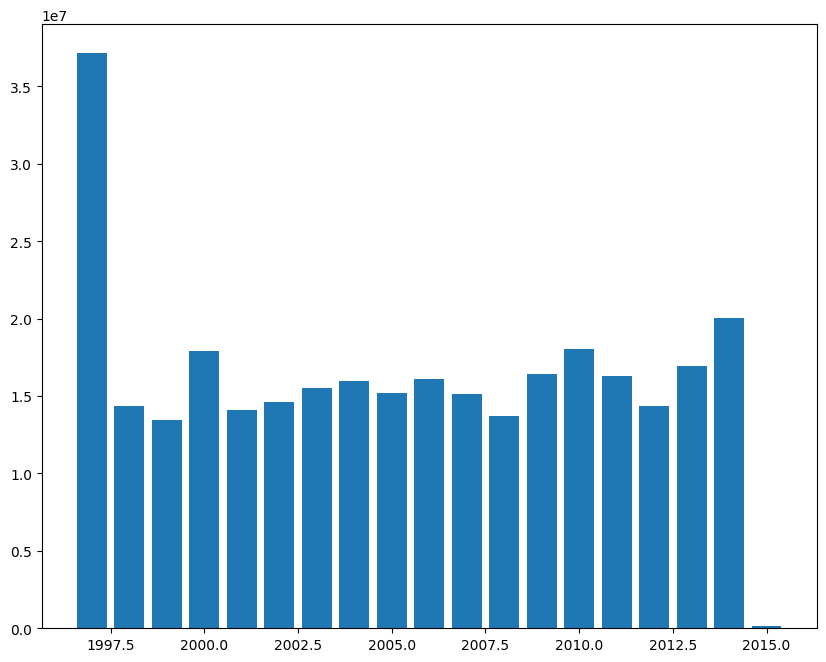

In [44]:
plt.figure(figsize=(10,8),dpi=100)
plt.bar(Sugar_df["Crop_Year"],Sugar_df["Production"])

In [45]:
sugar=Sugar_df.groupby('Season').sum()['Production']
sugar.nlargest() 

Season
Whole Year     3.745173e+09
Kharif         1.774444e+09
Winter         1.601724e+07
Rabi           2.771600e+04
Autumn         1.374295e+04
Name: Production, dtype: float64

In [46]:
sugar.nsmallest() 


Season
Summer         4.900000e+03
Autumn         1.374295e+04
Rabi           2.771600e+04
Winter         1.601724e+07
Kharif         1.774444e+09
Name: Production, dtype: float64

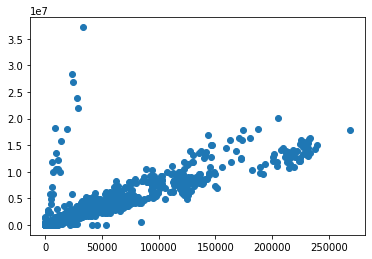

In [47]:
plt.scatter(Sugar_df['Area'],Sugar_df['Production']);

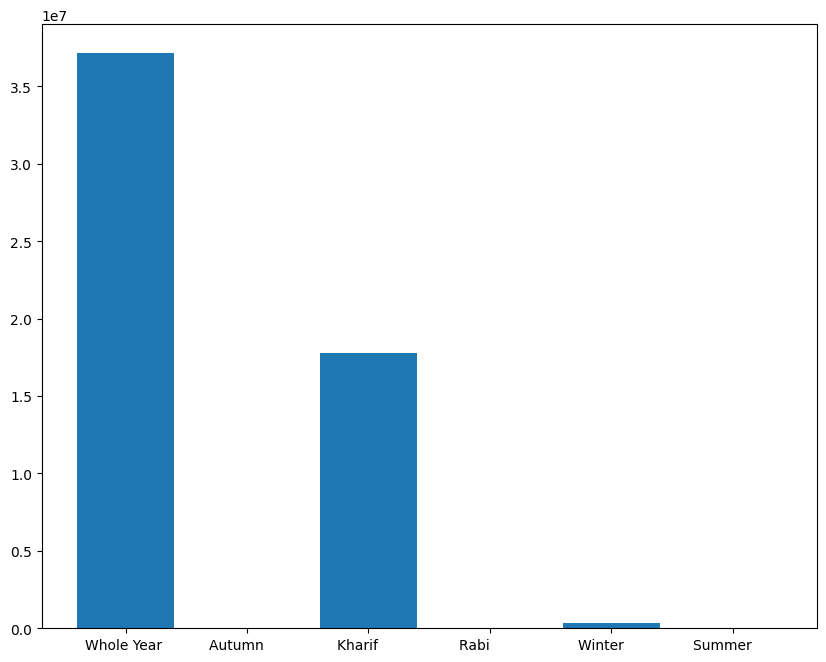

In [48]:
plt.figure(figsize=(10,8),dpi=100)
plt.bar(Sugar_df['Season'],Sugar_df['Production']);

In [49]:
#create LinearRegression model
# Maha_df
# col_df
col_df=Maha_df.drop(columns = ["Season","Crop"])
col_df 

,State_Name,District_Name,Crop_Year,Area,Production,Percentage_production
125191,Maharashtra,AHMEDNAGAR,1997,1.0,1113.0,7.883770e-07
125192,Maharashtra,AHMEDNAGAR,1997,17600.0,6300.0,4.462511e-06
125193,Maharashtra,AHMEDNAGAR,1997,274100.0,152800.0,1.082336e-04
125194,Maharashtra,AHMEDNAGAR,1997,40800.0,18600.0,1.317503e-05
125195,Maharashtra,AHMEDNAGAR,1997,900.0,1100.0,7.791686e-07
...,...,...,...,...,...,...
137814,Maharashtra,YAVATMAL,2014,4000.0,3300.0,2.337506e-06
137815,Maharashtra,YAVATMAL,2014,1300.0,200.0,1.416670e-07
137816,Maharashtra,YAVATMAL,2014,29100.0,26800.0,1.898338e-05
137817,Maharashtra,YAVATMAL,2014,9400.0,11500.0,8.145854e-06


In [63]:
x=col_df.iloc[:,2:4]
x

,Crop_Year,Area
125191,1997,1.0
125192,1997,17600.0
125193,1997,274100.0
125194,1997,40800.0
125195,1997,900.0
...,...,...
137814,2014,4000.0
137815,2014,1300.0
137816,2014,29100.0
137817,2014,9400.0


In [118]:
y=col_df.iloc[:,4]
y

125191      1113.0
125192      6300.0
125193    152800.0
125194     18600.0
125195      1100.0
            ...   
137814      3300.0
137815       200.0
137816     26800.0
137817     11500.0
137818    553700.0
Name: Production, Length: 12496, dtype: float64

In [119]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("x.shape :",x.shape)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y.shape :",y.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x.shape : (12496, 2)
x_train : (9996, 2)
x_test : (2500, 2)
y.shape : (12496,)
y_train : (9996,)
y_test : (2500,)


In [120]:
from sklearn.linear_model import LinearRegression
# creating model
agri_model=LinearRegression()

In [121]:
agri_model

LinearRegression()

In [122]:
# Training the model
agri_model.fit(x_train,y_train)

LinearRegression()

In [177]:
# predictions 
# Agri_prediction=agri_model.predict(x_test)
# Agri_prediction
y_pred = agri_model.predict(x_test) 
y_pred 

array([ 90038.99001293, 226092.25639988,  52911.05541638, ...,
       112075.08190896,  37167.95385562, 247170.42553345])

In [178]:
m=agri_model.coef_
m

array([6.71299528e+03, 2.10002472e+00])

In [179]:
c=agri_model.intercept_
m

array([6.71299528e+03, 2.10002472e+00])

In [180]:
# predictions_agrimodel =  pd.DataFrame({'Actual':y_test,'Predicted':Agri_prediction})
# predictions_agrimodel
predictions_agrimodel =  pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions_agrimodel

,Actual,Predicted
130825,1900.0,90038.990013
135871,22100.0,226092.256400
132001,5400.0,52911.055416
125806,1200.0,34655.008011
126554,3500.0,36132.109127
...,...,...
128538,142700.0,333264.355106
131406,3900.0,45820.558085
127600,18700.0,112075.081909
137627,100.0,37167.953856


In [181]:
y_test

130825      1900.0
135871     22100.0
132001      5400.0
125806      1200.0
126554      3500.0
            ...   
128538    142700.0
131406      3900.0
127600     18700.0
137627       100.0
126190    143100.0
Name: Production, Length: 2500, dtype: float64

In [182]:
#y=mx+c
# y=m*[17600.0]+c
# y	

In [183]:
agri_model.predict([[1997,17600.0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33430.41225585])

1

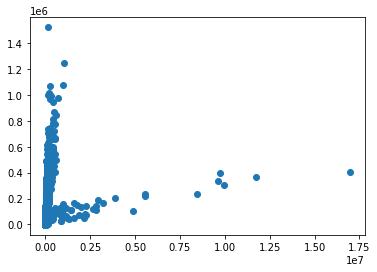

In [162]:

plt.scatter(y_test,Agri_prediction)


In [196]:
y_pred=y_pred.reshape(-1,1)
agri_model.score(x_train,y_train)

0.03011414390446021

In [142]:
train_set_predictions=agri_model.predict(x_train)
train_set_predictions

array([ 78713.02417247, 277439.11671534,  50593.94441286, ...,
        53968.15158984,  53170.64459356,  91291.92102793])

In [143]:
train_set_predictions.mean()

105438.05090036047

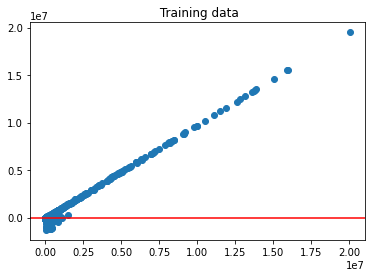

In [148]:
plt.scatter(x=y_train,y=y_train-train_set_predictions)
plt.axhline(y=0,color='red')
plt.xlabel("") 
plt.title(' Training data');